In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer/heart_disease_uci.csv
/kaggle/input/santander-customer/diabetes_DT.csv
/kaggle/input/santander-customer/titanic_train.csv
/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv
/kaggle/input/house-price-pred/house_price_train.csv
/kaggle/input/salary-data/__results__.html
/kaggle/input/salary-data/__resultx__.html
/kaggle/input/salary-data/__notebook__.ipynb
/kaggle/input/salary-data/__output__.json
/kaggle/input/salary-data/custom.css
/kaggle/input/salary-data/__results___files/__results___7_1.png
/kaggle/input/salary-data/__results___files/__results___8_1.png


In [5]:
# import pandas as pd 
import numpy as np
df=pd.read_csv('/kaggle/input/santander-customer/heart_disease_uci.csv')
duplicate_features=[]
quaisi_constant=[]
#One-Hot encoding 
df_cleaned=pd.get_dummies(df)
for col in df_cleaned.columns:
    if np.var(df_cleaned[col])==0:
        duplicate_features.append(col)

for col in df.columns:
    top_freq=df[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quaisi_constant.append(col)
        
print(quaisi_constant)
print(duplicate_features)
print(df.head())

[]
[]
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [9]:
df2=pd.read_csv('/kaggle/input/santander-customer/diabetes_DT.csv')
duplicate_features=[]
#One-Hot Encoding 
df2_cleaned1=pd.get_dummies(df2)
duplicate_features=[]
for col in df2_cleaned1.columns:
    if np.var(df2_cleaned1[col])==0:
        duplicate_features.append(col)

print(duplicate_features)


        

[]


In [18]:
import pandas as pd
import numpy as np

# Sample data with 2 constant features
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],        # Varying
    "B": [10, 10, 10, 10, 10],   # Constant
    "C": ["X", "X", "X", "X", "X"], # Constant categorical
    "D": [5, 6, 7, 8, 9]         # Varying
})

print("Original DataFrame:\n", df)

# One-hot encode
df_cleaned = pd.get_dummies(df)
print(df_cleaned)
# Detect constant features
constant_features = []
for col in df_cleaned.columns:
    if np.var(df_cleaned[col], ddof=0) == 0:
        constant_features.append(col)

print("\nConstant Features:", constant_features)


Original DataFrame:
    A   B  C  D
0  1  10  X  5
1  2  10  X  6
2  3  10  X  7
3  4  10  X  8
4  5  10  X  9
   A   B  D   C_X
0  1  10  5  True
1  2  10  6  True
2  3  10  7  True
3  4  10  8  True
4  5  10  9  True

Constant Features: ['B', 'C_X']


In [30]:
quasi_constant = []
for col in df2_cleaned1.columns:
    top_freq = df2_cleaned1[col].value_counts(normalize=True).max()
    if top_freq > 0.95:
        quasi_constant.append(col)

print("Quasi-constant features:", quasi_constant)


Quasi-constant features: []


In [34]:
quasi_constant=[]
for col in df_cleaned.columns:
    top_freq=df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)

print(quasi_constant)     #Santander Dataset Quasi_Constant Features 

['cp_typical angina', 'thal_fixed defect']


In [42]:
#Duplicate Features in Santander DAtaset 
duplicate_features=[]

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_featues.append(df_cleaned.columns[j])
print(duplicate_features)

[]


In [5]:
#Duplocate features in Santander dataset 
dff=pd.read_csv('/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv')
df_cleaned=pd.get_dummies(dff)
constant_features=[]
quasi_constant=[]
duplicate_features=[]

for col in df_cleaned.columns:
    if np.var(df_cleaned[col].values)==0:
        constant_features.append(col)

print(constant_features)

for col in df_cleaned.columns:
    top_freq = df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)
print()
print(quasi_constant)

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_features.append(df_cleaned.columns[j])

print()
print(duplicate_features)




['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']

['var3', 'imp_ent_var16_ult1', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_

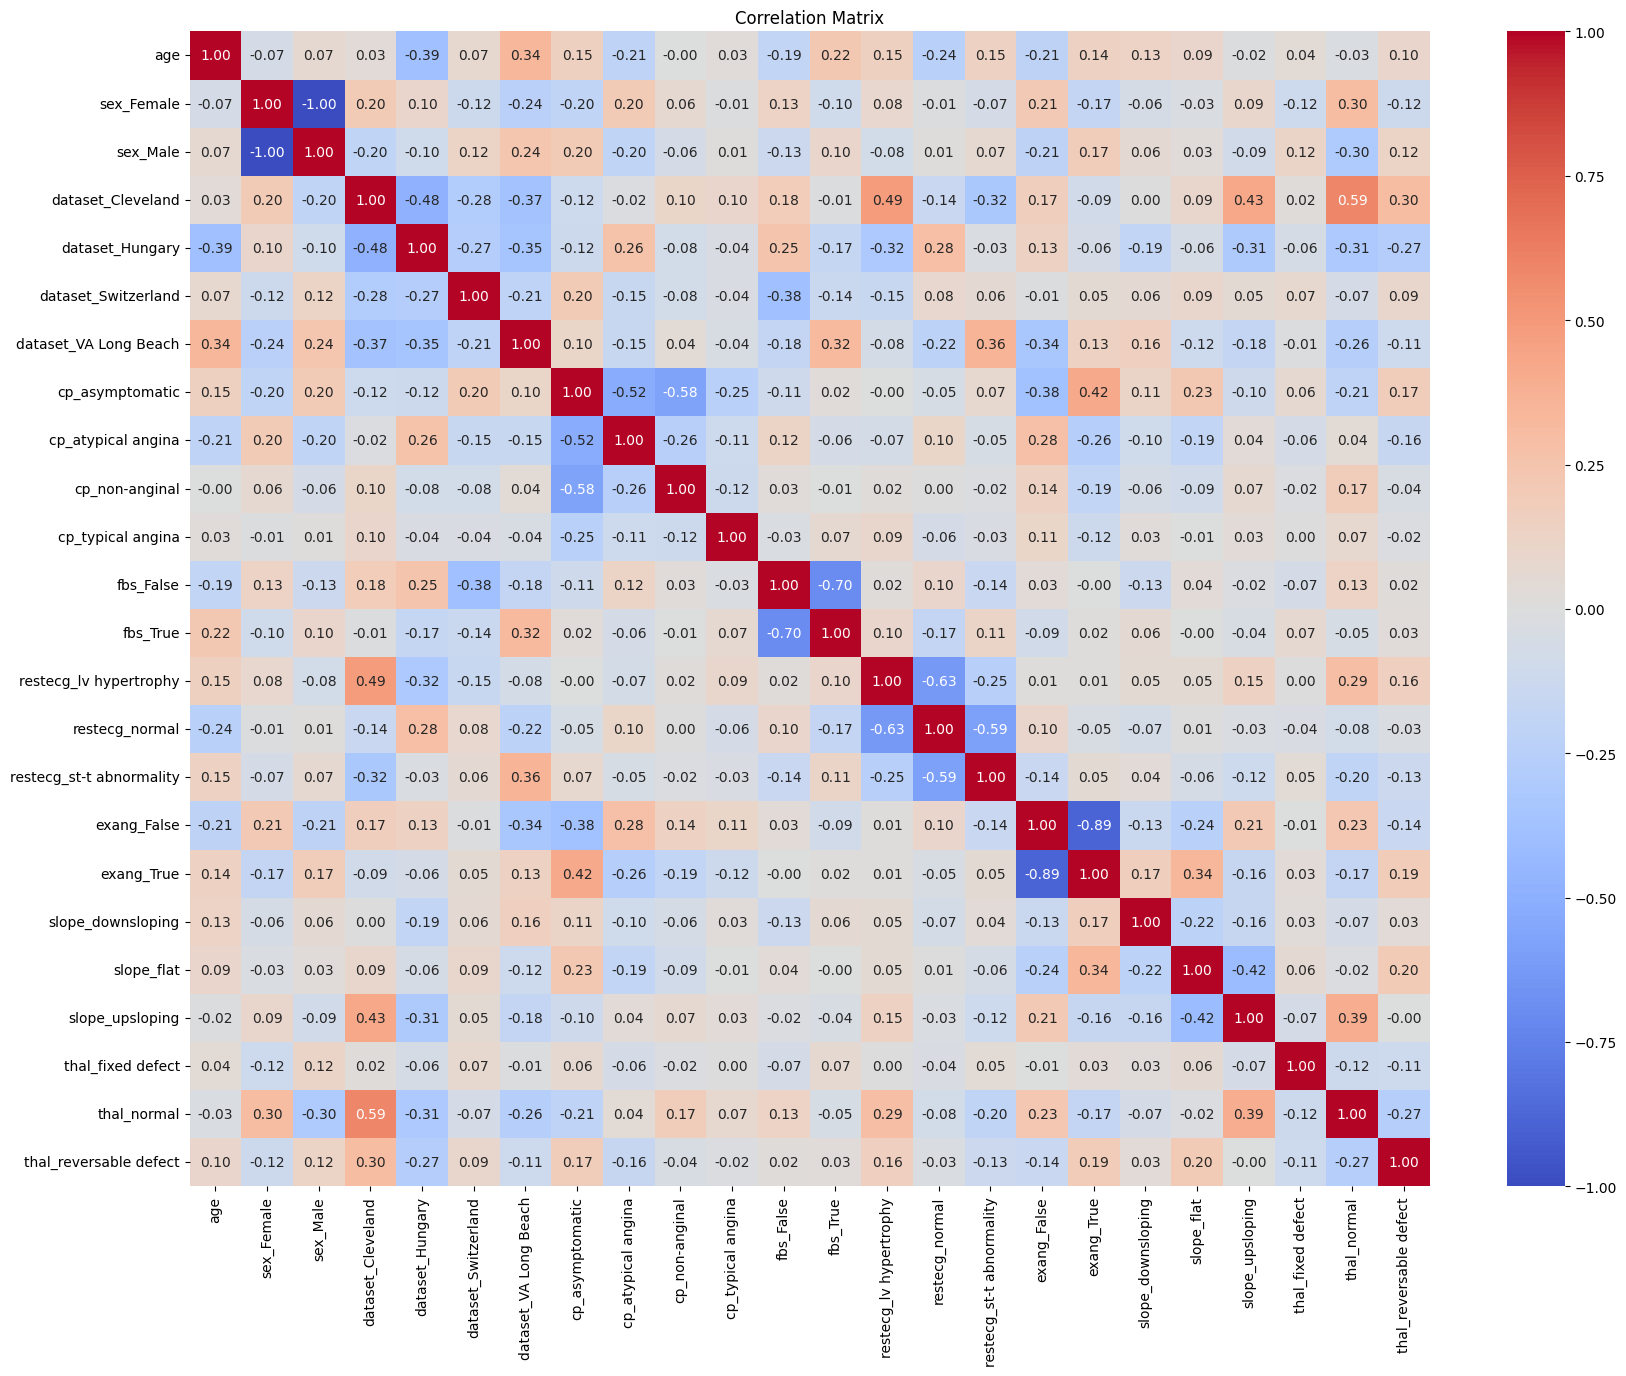

{'sex_Female', 'exang_False'}


In [15]:
#Coorelation for Heart Diesease 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Handling null values
cols_null=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        cols_null.append(col)
  
df=pd.get_dummies(df) #One-hot encoding 
X=df.drop(['id','num','trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],axis=1)
y=df['num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
corr_matrix=X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Corr_cols=set()
threshold=0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            Corr_cols.add(corr_matrix.columns[j])


print(Corr_cols)

X_train=X_train.drop(list(Corr_cols),axis=1)




Index(['sex_Male', 'dataset_Hungary', 'cp_asymptomatic', 'cp_atypical angina'], dtype='object')


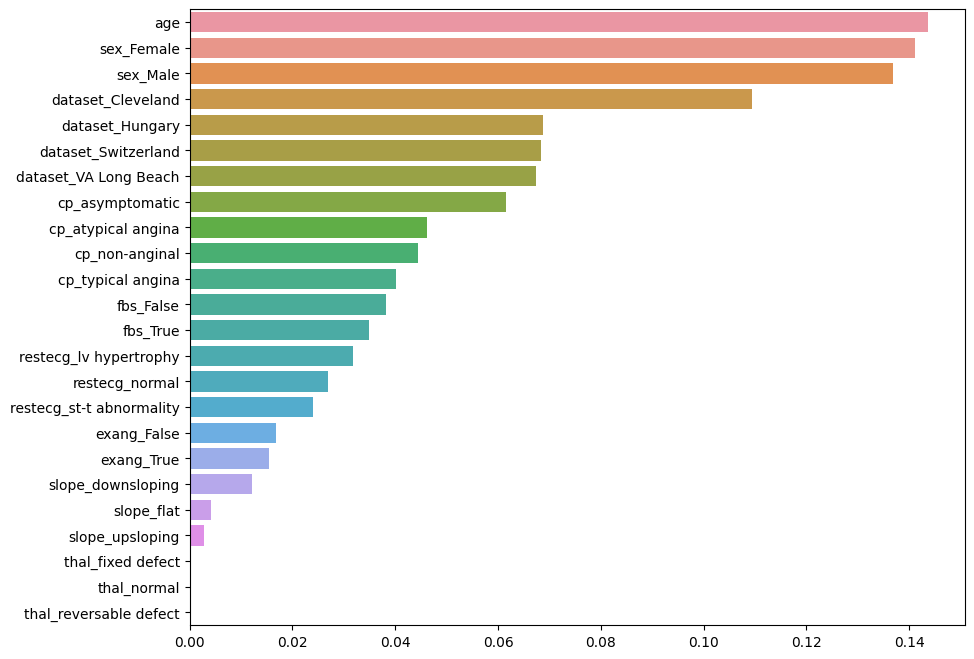

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Assuming 'X' and 'y' are your feature DataFrame and target Series
mi_scores = mutual_info_classif(X, y)

# 2. Create a pandas Series for easy plotting
# This pairs each feature name with its MI score
mi_scores_series = pd.Series(mi_scores,index=X.columns)

mi_scores_series = mi_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
 # Adjust size as needed
plt.figure(figsize=(10,8))
sns.barplot(x=mi_scores_series,y=X.columns)

selector=SelectKBest(mutual_info_classif,k=4)
selector.fit(X_train,y_train)
selected_features=X_train.columns[selector.get_support()]

print(selected_features)

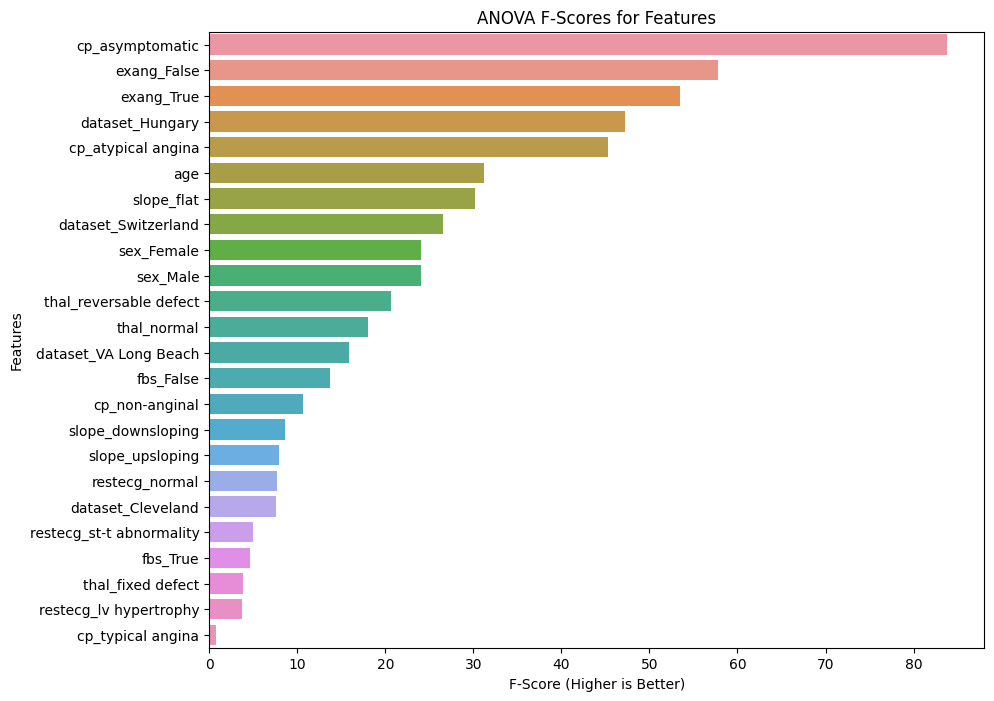

Index(['dataset_Hungary', 'cp_asymptomatic', 'exang_False', 'exang_True'], dtype='object')


In [90]:
#ANOVA ==> Analysis of Variance 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Assuming 'X' and 'y' are your feature DataFrame and target Series

# 1. Calculate ANOVA F-scores
# f_classif returns F-scores and their corresponding p-values
# We only need the F-scores for this plot
f_scores, p_values = f_classif(X, y)

# 2. Create a pandas Series for easy plotting
f_scores_series = pd.Series(f_scores, name="F-Scores", index=X.columns)

# 3. Sort the scores in descending order
f_scores_series = f_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.barplot(x=f_scores_series, y=f_scores_series.index)
plt.title("ANOVA F-Scores for Features")
plt.xlabel("F-Score (Higher is Better)")
plt.ylabel("Features")
plt.show()

selector=SelectKBest(f_classif,k=4)
selector.fit(X,y)
selected_features=X.columns[selector.get_support()]
print(selected_features)

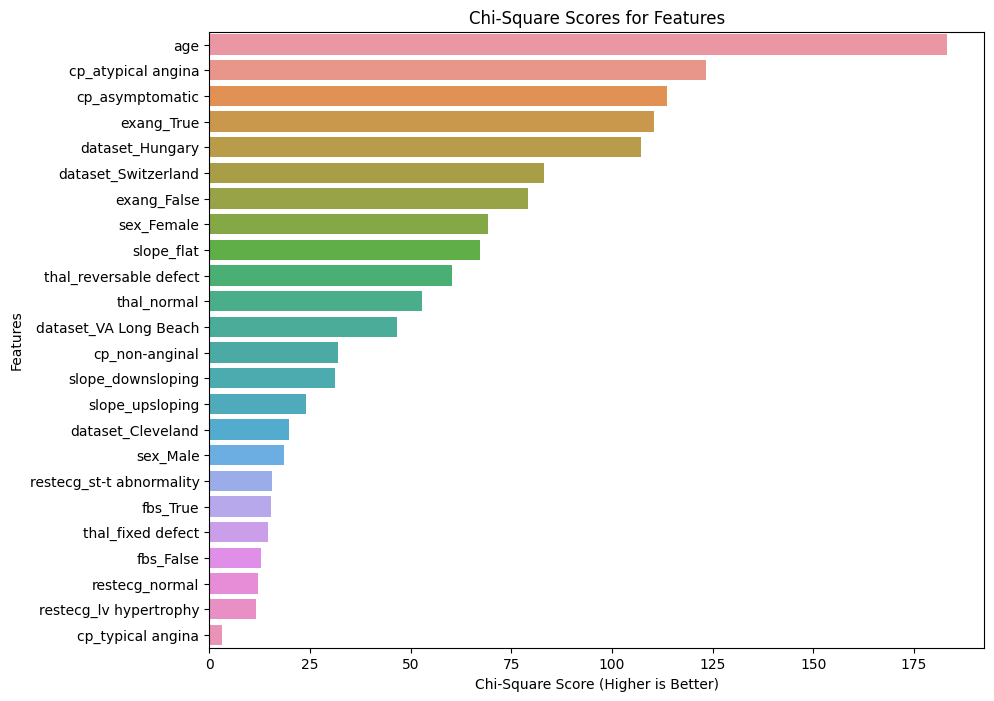

Index(['age', 'cp_asymptomatic', 'cp_atypical angina', 'exang_True'], dtype='object')


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Assuming 'X' contains only non-negative features and 'y' is your target Series

# 1. Calculate Chi-square scores
# chi2 returns the scores and their corresponding p-values
chi_scores, p_values = chi2(X, y)

# 2. Create a pandas Series for easy plotting
chi_scores_series = pd.Series(chi_scores, index=X.columns)

# 3. Sort the scores in descending order
chi_scores_series = chi_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.barplot(x=chi_scores_series, y=chi_scores_series.index)
plt.title("Chi-Square Scores for Features")
plt.xlabel("Chi-Square Score (Higher is Better)")
plt.ylabel("Features")
plt.show()

selector=SelectKBest(chi2,k=4)
selector.fit(X_train,y_train)

selected_features=X_train.columns[selector.get_support()]

print(selected_features)

Univariate ROC-AUC Scores (Multiclass) 
exang_False                 0.671653
cp_asymptomatic             0.666675
dataset_Hungary             0.657919
exang_True                  0.650207
age                         0.624608
cp_atypical angina          0.602866
slope_flat                  0.588339
thal_reversable defect      0.585023
dataset_VA Long Beach       0.581897
sex_Female                  0.566598
sex_Male                    0.566598
dataset_Switzerland         0.561333
cp_non-anginal              0.561223
thal_normal                 0.561134
restecg_normal              0.560561
fbs_False                   0.557315
slope_downsloping           0.551401
slope_upsloping             0.540110
restecg_st-t abnormality    0.531895
fbs_True                    0.529751
thal_fixed defect           0.529011
dataset_Cleveland           0.508300
cp_typical angina           0.502586
restecg_lv hypertrophy      0.464286
dtype: float64


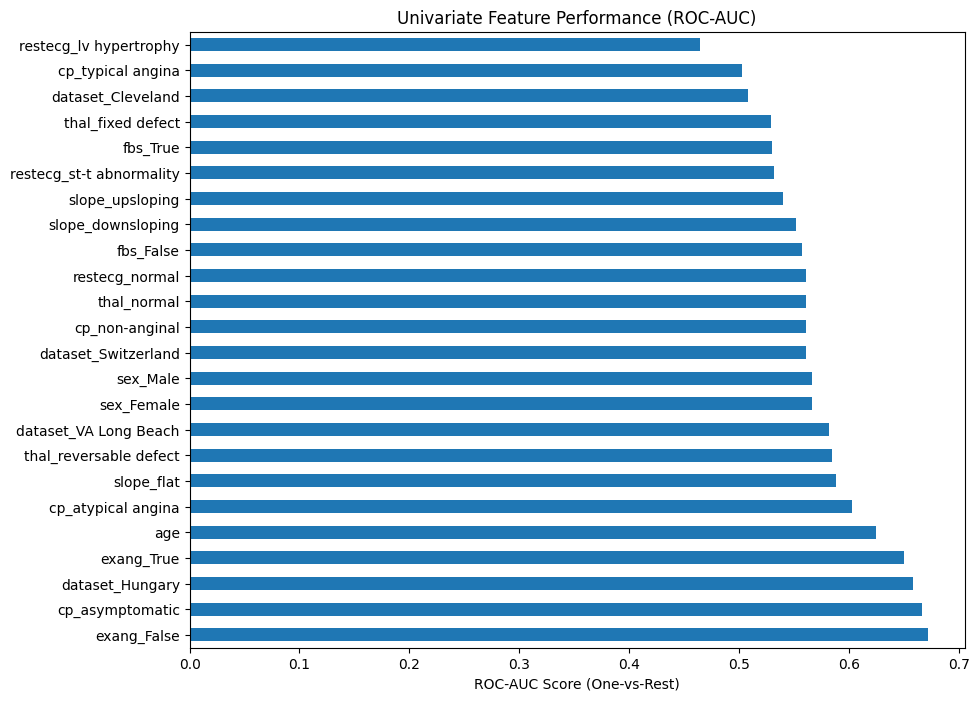

In [13]:
#AUC-ROC curve 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your feature DataFrame and multiclass target Series

auc_scores = {}

for feature in X.columns:
    X_single_feature = X[[feature]]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_single_feature, y, test_size=0.3, random_state=42
    )
    
    model = DecisionTreeClassifier(max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # --- CHANGE 1: Get probabilities for ALL classes ---
    # Remove the [:, 1] to pass the full probability matrix
    y_pred_proba = model.predict_proba(X_test)
    
    # --- CHANGE 2: Add the multi_class parameter ---
    score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    auc_scores[feature] = score

# Convert to a Series and sort
auc_scores_series = pd.Series(auc_scores).sort_values(ascending=False)

# Display and plot the results
print("Univariate ROC-AUC Scores (Multiclass) ")
print(auc_scores_series)

auc_scores_series.plot.barh(figsize=(10, 8))
plt.title("Univariate Feature Performance (ROC-AUC)")
plt.xlabel("ROC-AUC Score (One-vs-Rest)")
plt.show()

In [20]:
#Wrapper methods 
#Sequencial Forward Feature Selection 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS ,ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
sfs=SFS(clf,k_features=5,forward=False,floating=False,scoring="accuracy",cv=3,n_jobs=-1)
sfs.fit(X_train_scaled,y_train)

print(sfs.k_feature_names_)

print(sfs.k_score_) 

sfs_X_train=sfs.transform(X_train_scaled)
sfs_X_test=sfs.transform(X_test_scaled)

clf.fit(sfs_X_train,y_train)

print(clf.score(sfs_X_test,y_test))

('3', '4', '9', '12', '17')
0.5450119539230601
0.5688405797101449


In [ ]:
#Exhaustive feature selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
efs=EFS(clf,min_features=1,max_features=5,scoring='accuracy',cv=3,n_jobs=-1)
efs.fit(X_train_scaled,y_train)

print(efs.best_feature_names_)

print(efs.best_score_)

efs_X_train=efs.transform(X_train_scaled)
efs_X_test=efs.transform(X_test_scaled)

clf.fit(efs_X_train,y_test)

print(clf.score(sfs_X_test,y_test))

In [25]:
#Recursive feature Elimination
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rfe=RFE(estimator=clf,n_features_to_select=5)
rfe.fit(X_train_scaled,y_train)
y_pred=rfe.predict(X_test_scaled)
selected_features = X_train.columns[rfe.support_]
print(selected_features.tolist())
print(accuracy_score(y_test,y_pred))



['age', 'dataset_Hungary', 'cp_asymptomatic', 'exang_True', 'slope_flat']
0.48188405797101447


In [28]:
# ---------------- Import Libraries ----------------
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import pandas as pd

# ---------------- Load Dataset ----------------
# Diabetes dataset (regression problem, target = disease progression measure)
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Put features into a DataFrame for readability
df_X = pd.DataFrame(X, columns=feature_names)

# ---------------- LASSO (L1 Regularization) ----------------
# LASSO forces some coefficients to become exactly zero (feature selection)
lasso = Lasso(alpha=0.1).fit(X, y)

# Identify features kept (non-zero coefficients)
mask_lasso = lasso.coef_ != 0
X_lasso = df_X.loc[:, mask_lasso]

print("----- LASSO -----")
print("LASSO Coefficients:", lasso.coef_)
print("Original shape:", df_X.shape)
print("Reduced shape (LASSO):", X_lasso.shape)
print("Features Kept by LASSO:", list(X_lasso.columns))
print()

# ---------------- RIDGE (L2 Regularization) ----------------
# Ridge shrinks coefficients but does not make them exactly zero
ridge = Ridge(alpha=1.0).fit(X, y)

mask_ridge = ridge.coef_ != 0   # usually all True
X_ridge = df_X.loc[:, mask_ridge]

print("----- RIDGE -----")
print("Ridge Coefficients:", ridge.coef_)
print("Reduced shape (Ridge):", X_ridge.shape)
print("Features Kept by Ridge:", lis4) ] # 4. PCA Example
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# 4.a Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Standardization is necessary so that all features have equal variance
# Otherwise, features with larger scales dominate PCA

# 4.b Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot (PC1 vs PC2)
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label,0], X_pca[y==label,1], label=f'Class {label}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.legend()
plt.show()

# 4.c Most important variables for PC1 and PC2
loadings = pd.DataFrame(pca.components_.T, index=feature_names, columns=['PC1','PC2'])
print("Feature loadings on PC1 and PC2:")
print(loadings.sort_values(by='PC1', ascending=False))  # sorted by contribution

# 4.d Variance explained by PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]*100:.2f}%")
print(f"Variance explained by PC2: {explained_variance[1]*100:.2f}%")

# 4.e Number of PCs explaining more than 80% of total variance
pca_full = PCA().fit(X_scaled)  # fit PCA with all components
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_pcs_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of PCs to explain >80% variance: {num_pcs_80}")


pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

clf.fit(x_train_pca, y_train)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("PCA Test Accuracy: %.4f" % clf.score(x_test_pca, y_test))
t(X_ridge.columns))
print()

# ---------------- ELASTIC NET (L1 + L2 Regularization) ----------------
# Elastic Net combines LASSO (L1) and Ridge (L2)
# l1_ratio = balance between L1 and L2 (0.5 = equal mix)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)

mask_enet = enet.coef_ != 0
X_enet = df_X.loc[:, mask_enet]

print("----- ELASTIC NET -----")
print("Elastic Net Coefficients:", enet.coef_)
print("Reduced shape (Elastic Net):", X_enet.shape)
print("Features Kept by Elastic Net:", list(X_enet.columns))


----- LASSO -----
LASSO Coefficients: [  -0.         -155.3599757   517.18679544  275.07723537  -52.53936509
   -0.         -210.1579914     0.          483.91264753   33.67396468]
Original shape: (442, 10)
Reduced shape (LASSO): (442, 7)
Features Kept by LASSO: ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

----- RIDGE -----
Ridge Coefficients: [  29.46611189  -83.15427636  306.35268015  201.62773437    5.90961437
  -29.51549508 -152.04028006  117.3117316   262.94429001  111.87895644]
Reduced shape (Ridge): (442, 10)
Features Kept by Ridge: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

----- ELASTIC NET -----
Elastic Net Coefficients: [ 10.28633208   0.28598338  37.46465473  27.54476518  11.10885591
   8.3558916  -24.12080871  25.50549197  35.46569979  22.89498509]
Reduced shape (Elastic Net): (442, 10)
Features Kept by Elastic Net: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


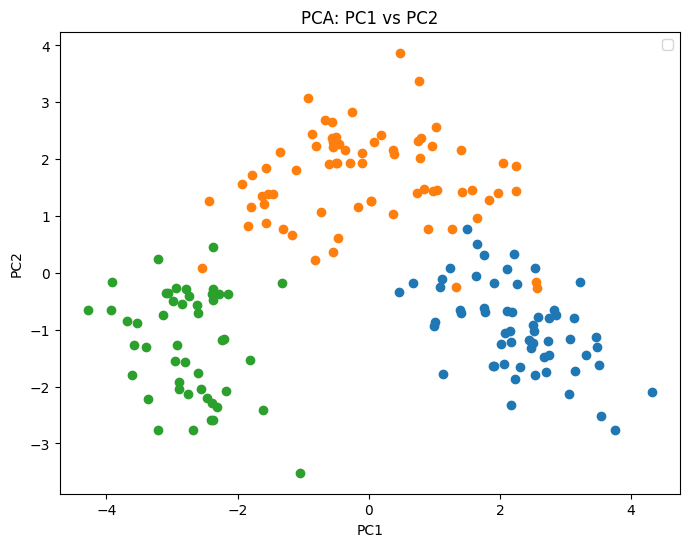


Feature loadings (contribution of features to PCs):
                                   PC1       PC2
flavanoids                    0.422934  0.003360
total_phenols                 0.394661 -0.065040
od280/od315_of_diluted_wines  0.376167  0.164496
proanthocyanins               0.313429 -0.039302
hue                           0.296715  0.279235
proline                       0.286752 -0.364903
alcohol                       0.144329 -0.483652
magnesium                     0.141992 -0.299634
ash                          -0.002051 -0.316069
color_intensity              -0.088617 -0.529996
alcalinity_of_ash            -0.239320  0.010591
malic_acid                   -0.245188 -0.224931
nonflavanoid_phenols         -0.298533 -0.028779

Variance explained by PC1: 36.20%
Variance explained by PC2: 19.21%

Number of PCs needed to explain >80% variance: 5

PCA explained variance ratio (5 PCs): [0.3587757  0.18347789 0.11776451 0.07464401 0.06720632]
PCA Test Accuracy: 1.0000


In [36]:
# PCA Example with Wine Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# 2. Standardize the variables (very important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3.a Scatter plot: PC1 vs PC2 (2D visualization)
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.legend()
plt.show()

# 4. Feature loadings (importance of features in PC1 and PC2)
loadings = pd.DataFrame(
    pca.components_.T, 
    index=feature_names, 
    columns=['PC1','PC2']
)
print("\nFeature loadings (contribution of features to PCs):")
print(loadings.sort_values(by='PC1', ascending=False))

# 5. Variance explained by PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print(f"\nVariance explained by PC1: {explained_variance[0]*100:.2f}%")
print(f"Variance explained by PC2: {explained_variance[1]*100:.2f}%")

# 6. How many PCs are needed to explain >80% of variance?
pca_full = PCA().fit(X_scaled)  # Fit PCA with all components
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_pcs_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\nNumber of PCs needed to explain >80% variance: {num_pcs_80}")

# 7. Train/Test split for classification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Apply PCA for dimensionality reduction (e.g., 5 PCs)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 9. Train a classifier (Logistic Regression here)
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_pca, y_train)

# 10. Evaluate classifier
print("\nPCA explained variance ratio (5 PCs):", pca.explained_variance_ratio_)
print("PCA Test Accuracy: %.4f" % clf.score(X_test_pca, y_test))


In [19]:
# Linear Regression on House Price Prediction

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. Load dataset
df = pd.read_csv("/kaggle/input/house-price-pred/house_price_train.csv")

# 3. Handle missing values
# Option 1: Drop rows with missing values (simple for learning)
Nans=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        Nans.append(col)


for col in Nans:
    if df[col].dtype in ['float64', 'int64']:  # Numeric columns
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # Categorical columns
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        
        
        

# 4. Convert categorical variables to numeric (one-hot encoding)
df = pd.get_dummies(df)

# 5. Define features (X) and target (y)
X = df.drop("SalePrice", axis=1)   # independent variables
y = df["SalePrice"]                # dependent variable

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 8. Predictions
y_pred = lr.predict(X_test)

# 9. Intercept and Slopes
print("Intercept (w0):", lr.intercept_)
print("\nSlopes / Coefficients (w):")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.2f}")

# 10. Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

/tmp/ipykernel_36/1902116400.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_36/1902116400.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load dataset (ensure Salary_Data.csv is in your working directory)
df = pd.read_csv("/kaggle/input/salary-data/Salary_Data.csv")
print(df.head())

# 3. Define independent and dependent variables
X = df[['YearsExperience']]   # Independent variable
y = df['Salary']              # Dependent variable

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Get intercept & slope
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (b0): {intercept:.2f}")
print(f"Slope (b1): {slope:.2f}")

print(f"\nInterpretation: For each additional year of experience, salary increases by approximately {slope:.2f} units.")

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Plot regression line
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Linear Regression)")
plt.legend()
plt.show()
